## 3.5 뉴스 기사 분류 : 다중 분류 문제

로이터 데이터셋은 짧은 뉴스 기사와 토픽의 집합으로, 텍스트 분류를 위해 널리 사용되는 데이터셋으로, 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망을 만드는 내용이다.

- 실제 데이터에 대한 상세 기술

 클래스가 많기 때문에 다중 분류에 해당하고, 각 데이터 포인트가 정확히 하나의 범주로 표현되기 때문에 단일 레이블 다중 분류에 해당한다.
 출력 클래스의 개수가 3.4절에서 2개였던 것에 비해 46개로 늘어났다.


- 예측하고자 하는 방법 / 방향 기술

  46개의 분할 초평면을 복원하기에는 부족한 중간층의 저차원 표현 공간으로 압축하려 했기 때문에 손실이 발생했다.
  여기서 필요한 정보 전부를 넣지는 못했다. 따라서 더 크거나 작은 층을 사용해볼 수 있을 것이다.


 - 학습을 위해 데이터가 어떻게 가공/처리 되었는지 기술
  
  레이블을 범주형 인코딩(또는 원-핫 인코딩)으로 인코딩하고 categorical_crossentropy 손실함수를 사용한다.
  단일 레이블, 다중 분류 문제에 해당하므로 N개의 클래스에 대한 확률 분호를 출력하기 위해 softmax 활성화 함수를 사용해야 한다.
  
  
 - 사용된 모델의 입력층과 출력층에 대한 기술
 46개의 클래스를 구분하기에 16차원을 가진 중간층 공간은 제약이 많기 때문에, 64개의 유닛을 사용한다.
 마지막 Dense 층의 크기는 46인데, 이는 각 입력 샘플에 대해서 46차원의 벡터를 출력한다는 뜻이다. 이 벡터의 각 원소(차원)는 다른 출력
 클래스가 인코딩된 것이다.




In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

In [23]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [25]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [26]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [27]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [29]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 167us/step - loss: 2.7783 - acc: 0.5021 - val_loss: 1.8357 - val_acc: 0.6200
Epoch 2/20
7982/7982 [==============================] - 1s 127us/step - loss: 1.4835 - acc: 0.6922 - val_loss: 1.3450 - val_acc: 0.7000
Epoch 3/20
7982/7982 [==============================] - 1s 130us/step - loss: 1.0786 - acc: 0.7727 - val_loss: 1.1508 - val_acc: 0.7490
Epoch 4/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.8463 - acc: 0.8222 - val_loss: 1.0430 - val_acc: 0.7740
Epoch 5/20
7982/7982 [==============================] - 1s 135us/step - loss: 0.6728 - acc: 0.8596 - val_loss: 0.9650 - val_acc: 0.8060
Epoch 6/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.5374 - acc: 0.8884 - val_loss: 0.9397 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.4358 - acc: 0.9089 - val_loss: 0.8882 - val_acc: 0.8180


In [30]:
import matplotlib.pyplot as plt

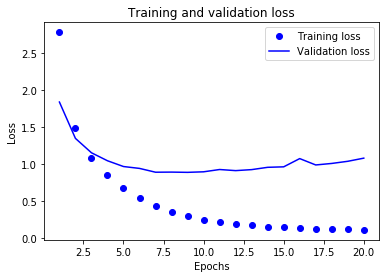

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

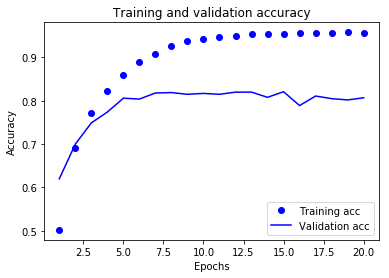

In [32]:
plt.clf() 

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 163us/step - loss: 2.8535 - acc: 0.4022 - val_loss: 1.9506 - val_acc: 0.6340
Epoch 2/9
7982/7982 [==============================] - 1s 130us/step - loss: 1.5744 - acc: 0.6898 - val_loss: 1.3817 - val_acc: 0.7110
Epoch 3/9
7982/7982 [==============================] - 1s 129us/step - loss: 1.1286 - acc: 0.7676 - val_loss: 1.1845 - val_acc: 0.7390
Epoch 4/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.8774 - acc: 0.8226 - val_loss: 1.0474 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 1s 128us/step - loss: 0.6982 - acc: 0.8559 - val_loss: 0.9800 - val_acc: 0.8030
Epoch 6/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.5531 - acc: 0.8899 - val_loss: 0.9446 - val_acc: 0.7990
Epoch 7/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.4479 - acc: 0.9100 - val_loss: 0.9432 - val_acc: 0.8090
Epoch 8

In [34]:
results

[0.9764160755374871, 0.7920747996703493]

In [35]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19056099732858414

In [36]:
predictions = model.predict(x_test)

In [37]:
predictions[0].shape

(46,)

In [38]:
np.sum(predictions[0])

0.9999998

In [39]:
np.argmax(predictions[0])

3

In [40]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [41]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [42]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 216us/step - loss: 3.1814 - acc: 0.2339 - val_loss: 2.5863 - val_acc: 0.2800
Epoch 2/20
7982/7982 [==============================] - 1s 186us/step - loss: 2.0755 - acc: 0.5361 - val_loss: 1.7404 - val_acc: 0.6080
Epoch 3/20
7982/7982 [==============================] - 1s 186us/step - loss: 1.5222 - acc: 0.6164 - val_loss: 1.5527 - val_acc: 0.6100
Epoch 4/20
7982/7982 [==============================] - 2s 191us/step - loss: 1.3447 - acc: 0.6303 - val_loss: 1.4920 - val_acc: 0.6080
Epoch 5/20
7982/7982 [==============================] - 2s 206us/step - loss: 1.2362 - acc: 0.6538 - val_loss: 1.4510 - val_acc: 0.6370
Epoch 6/20
7982/7982 [==============================] - 2s 210us/step - loss: 1.1479 - acc: 0.6858 - val_loss: 1.4569 - val_acc: 0.6500
Epoch 7/20
7982/7982 [==============================] - 2s 204us/step - loss: 1.0673 - acc: 0.7192 - val_loss: 1.4473 - val_acc: 0.6720
